In [ ]:
from datetime import date, datetime, timedelta
# from dotenv import load_dotenv
import os
import json
import pandas as pd
import requests
import time

from functools import reduce


# from client import FtxClient

# load_dotenv()
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('ETH_1H_new.csv', parse_dates=['timestamp'], index_col=['timestamp'])
df1 = pd.read_csv('BTC_1H_new.csv', parse_dates=['timestamp'], index_col=['timestamp'])
df2 = pd.read_csv('LTC_ftx_1H.csv', parse_dates=['timestamp'], index_col=['timestamp'])
df3 = pd.read_csv('SOL_ftx_1H.csv', parse_dates=['timestamp'], index_col=['timestamp'])
df4 = pd.read_csv('BCH_ftx_1H.csv', parse_dates=['timestamp'], index_col=['timestamp'])

In [ ]:
k_new = pd.merge(k,  k_1,  on ='timestamp')

In [ ]:
df = pd.read_csv('big_csv.csv')
df.set_index("timestamp", inplace=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (33,43) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data = df.filter(['close_x', 'close_y'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .9)
training_data_len

36338

I notice that there are lot of inconsistency in the big_csv. not all columns can capture ~17000 data as a result it leave room for more null values as they try to fit in. Again when we have gotten 2h, 4h, 16h etc the rows would not match as their would be more data in one column that the other due to the hourly difference. Although i still went ahead to do something. Like join various ftx data togther. I noticed that Deribit and ftx have similar values and i just did the mean for both BTC and ETH for the main time. Would be hoping to here your suggestions on how to go around with this. Also as a result of some columns not having more data they are now joining downward

In [ ]:
df.isnull().sum()

Unnamed: 0                    0
Unnamed: 0_x              27271
open_BCH_ftx_1H_x         27271
high_BCH_ftx_1H_x         27271
low_BCH_ftx_1H_x          27271
                          ...  
open_SOL_2020_ftx_2H      37012
high_SOL_2020_ftx_2H      37012
low_SOL_2020_ftx_2H       37012
close                     37012
volume_SOL_2020_ftx_2H    37012
Length: 265, dtype: int64

In [ ]:
new_all.head(1)

,Unnamed: 0_x_x,ticks_deribit_1H_ETH,status_deribit_1H_ETH,cost_deribit_1H_ETH,ETH_open_average_1H,ETH_close_average_1H,high_average_1H,ETH_volume_average_1H,ETH_price_average_1H,ETH_low_average_1H,...,volume_LTC_2020_ftx_1H,price_x,Unnamed: 0_y_y,Unnamed: 0.1_y,open_SOL_2020_ftx_1H,high_SOL_2020_ftx_1H,low_SOL_2020_ftx_1H,close,volume_SOL_2020_ftx_1H,price_y
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-11-26 07:00:00,0,1.606378e+09,ok,6097.0,524.915,515.58,525.03,1236.647065,515.58,513.85,...,14935.8551,76.26,0,7,1.905,1.905,1.8425,1.85,48.1,1.85


In [ ]:
k_new.drop(['price_x', 'price_y'], axis=1, inplace=True)

In [ ]:
k_new.columns

Index(['Unnamed: 0_x_x', 'ticks_deribit_1H_ETH', 'status_deribit_1H_ETH',
       'cost_deribit_1H_ETH', 'ETH_open_average_1H', 'ETH_close_average_1H',
       'high_average_1H', 'ETH_volume_average_1H', 'ETH_price_average_1H',
       'ETH_low_average_1H', 'Unnamed: 0_y_x', 'ticks_deribit_1H_BTC',
       'status_deribit_1H_BTC', 'open_deribit_1H_BTC', 'low_deribit_1H_BTC',
       'cost_deribit_1H_BTC', 'BTC_low_average_1H', 'BTC_open_average_1H',
       'BTC_close_average_1H', 'BTC_high_average_1H', 'BTC_volume_average_1H',
       'Unnamed: 0_x_y', 'Unnamed: 0.1_x', 'open_LTC_2020_ftx_1H',
       'high_LTC_2020_ftx_1H', 'low_LTC_2020_ftx_1H', 'close_LTC_2020_ftx_1H',
       'volume_LTC_2020_ftx_1H', 'Unnamed: 0_y_y', 'Unnamed: 0.1_y',
       'open_SOL_2020_ftx_1H', 'high_SOL_2020_ftx_1H', 'low_SOL_2020_ftx_1H',
       'close', 'volume_SOL_2020_ftx_1H'],
      dtype='object')

In [ ]:
k_new.drop(['status_deribit_1H_ETH', 'Unnamed: 0_x_x','BTC_close_average_1H','Unnamed: 0_y_x','Unnamed: 0_y_y','ETH_close_average_1H', 'close_LTC_2020_ftx_1H','Unnamed: 0_y_y','close'],axis=1, inplace=True)

Putting all the close column and making a new dataset with it

In [ ]:
df_new = pd.DataFrame({'BTC_1H_new.csv': df1.BTC_close_average_1H,
                   'ETH_1H_new.csv': df.ETH_close_average_1H,
                   'LTC_deribit_1H.csv': df2.close_LTC_2020_ftx_1H,
                   'SOL_ftx_1H.csv':df3.close,
                    'BCH_ftx_1H.csv':df3.close})
df_new.head()

,BTC_1H_new.csv,ETH_1H_new.csv,LTC_deribit_1H.csv,SOL_ftx_1H.csv,BCH_ftx_1H.csv
timestamp,,,,,
2020-11-26 07:00:00,17620.25,515.580,76.260,1.8500,1.8500
2020-11-26 08:00:00,16863.00,498.380,74.085,1.7625,1.7625
2020-11-26 09:00:00,17063.75,504.095,74.865,1.8200,1.8200
2020-11-26 10:00:00,17293.50,512.685,74.845,1.8425,1.8425
2020-11-26 11:00:00,17119.25,513.850,73.900,1.8725,1.8725


In [ ]:
df_new.describe()

,BTC_1H_new.csv,ETH_1H_new.csv,LTC_deribit_1H.csv,SOL_ftx_1H.csv,BCH_ftx_1H.csv
count,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000
mean,43668.918516,2653.999470,160.077955,80.286558,80.286558
std,10821.871539,1023.287371,55.175429,68.347255,68.347255
min,16494.000000,495.465000,55.980000,1.192500,1.192500
25%,36640.375000,1944.531250,122.111250,25.738750,25.738750
50%,43070.750000,2709.350000,151.990000,53.107500,53.107500
75%,50630.312500,3340.262500,187.503750,136.335000,136.335000
max,68660.500000,4976.125000,411.150000,258.632500,258.632500


In [ ]:
import seaborn as sns

There was large volume between 40000 and 50000 sold for the last two years

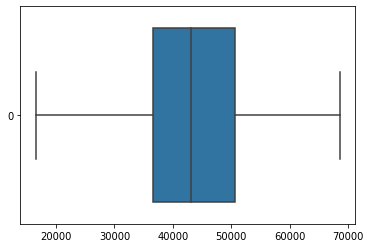

In [ ]:
ax = sns.boxplot(data=df_new['BTC_1H_new.csv'], orient="h")

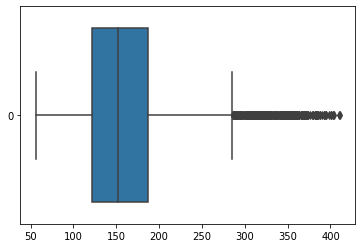

In [ ]:
import seaborn as sns
ax = sns.boxplot(data=df_new['LTC_deribit_1H.csv'], orient="h")

## On the box plot below, we see that LTC closing hourly price was most of the time between $100 and $150 for about the last two yeasr. **bold text**

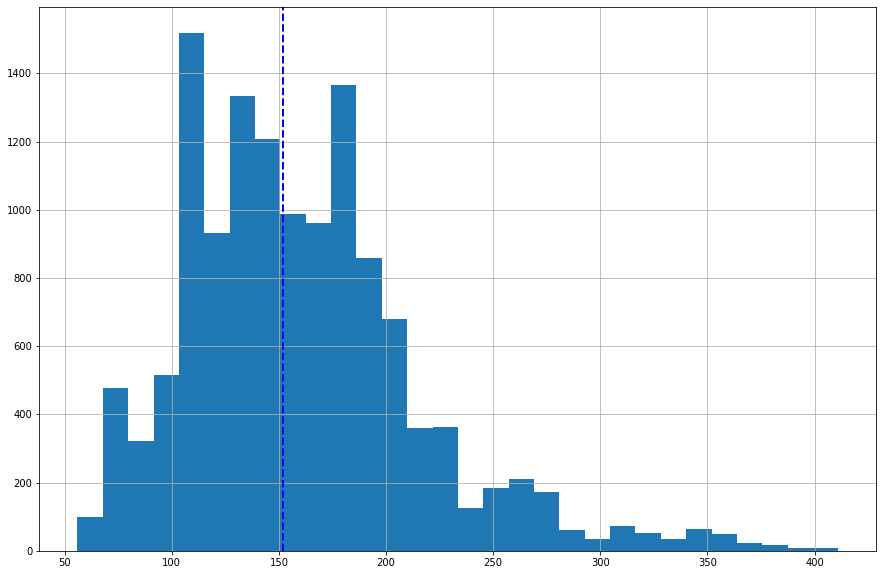

In [ ]:
df_new['LTC_deribit_1H.csv'].hist(bins=30, figsize=(15,10)).axvline(df_new['LTC_deribit_1H.csv'].median(), color='b', linestyle='dashed', linewidth=2)

Observations

LTC closing price was wa over $100 for many hours.

Visualize closing prices of all 

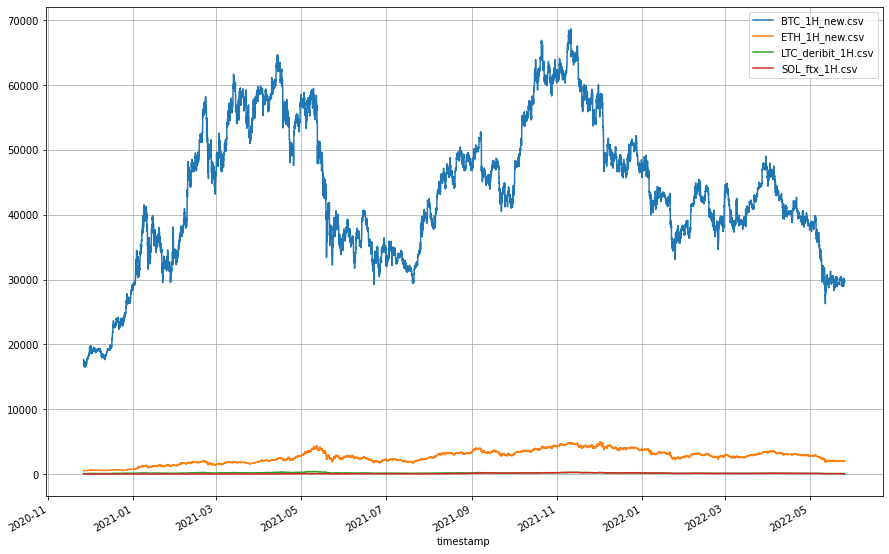

In [ ]:
df_new.plot(grid=True, figsize=(15, 10))

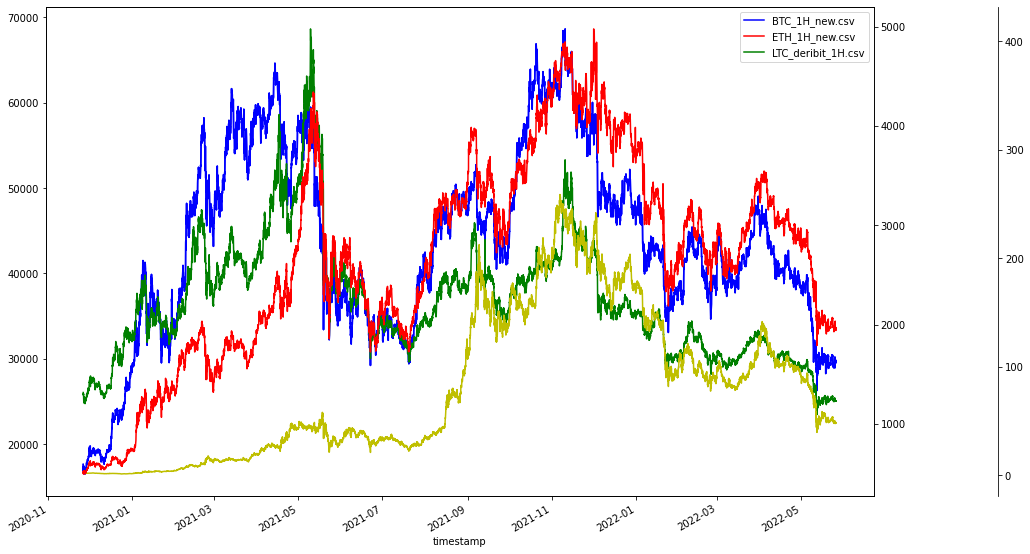

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)
df_new['BTC_1H_new.csv'].plot(ax=ax1, style='b-')
df_new['ETH_1H_new.csv'].plot(ax=ax1, style='r-', secondary_y=True)
df_new['LTC_deribit_1H.csv'].plot(ax=ax2, style='g-')
df_new['SOL_ftx_1H.csv'].plot(ax=ax2, style='y-')
df_new['BTC_1H_new.csv'].plot(ax=ax1, style='b-')

# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC_1H_new.csv', 'ETH_1H_new.csv', 'LTC_deribit_1H.csv', 'SOL_ftx_1H.csv', 'BTC_1H_new.csv'])

## From the graph above you would notice that there is a downward trend from all coins

BTC, ETH and LTC were highly correlated in the past 2 years. This means, when BTC closing price increased, ETH and LTC followed.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


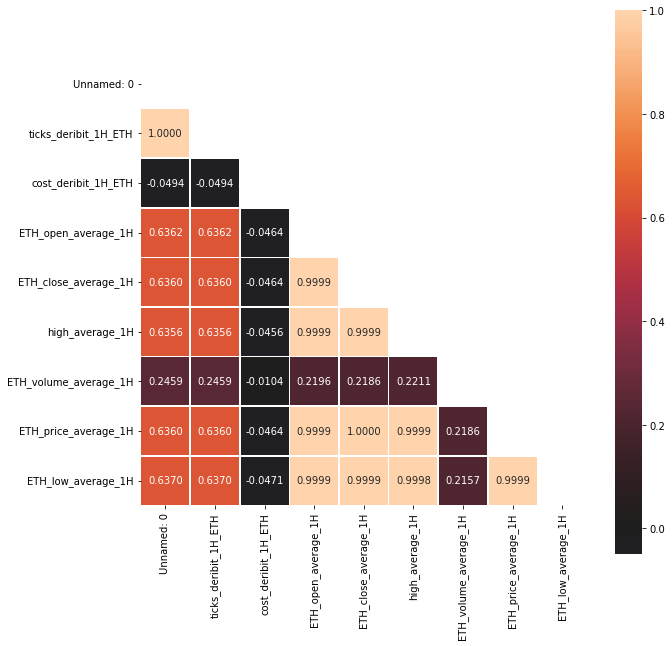

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)


## Buy and hold strategy
Buy and hold is a passive investment strategy in which an investor buys a cryptocurrency and holds it for a long period, regardless of fluctuations in the market.

I analyze returns using the Buy and hold strategy for the past 2 years. We calculate the return percentage, where t represents a certain period and price is the initial closing price:

In [ ]:
df_return = df_new.apply(lambda x: x / x[0])
df_return.head()

,BTC_1H_new.csv,ETH_1H_new.csv,LTC_deribit_1H.csv,SOL_ftx_1H.csv,BCH_ftx_1H.csv
timestamp,,,,,
2020-11-26 07:00:00,1.000000,1.000000,1.000000,1.000000,1.000000
2020-11-26 08:00:00,0.957024,0.966640,0.971479,0.952703,0.952703
2020-11-26 09:00:00,0.968417,0.977724,0.981707,0.983784,0.983784
2020-11-26 10:00:00,0.981456,0.994385,0.981445,0.995946,0.995946
2020-11-26 11:00:00,0.971567,0.996645,0.969053,1.012162,1.012162


We show that SOL was the most profitable for the period between 2021/9 and 2022/1

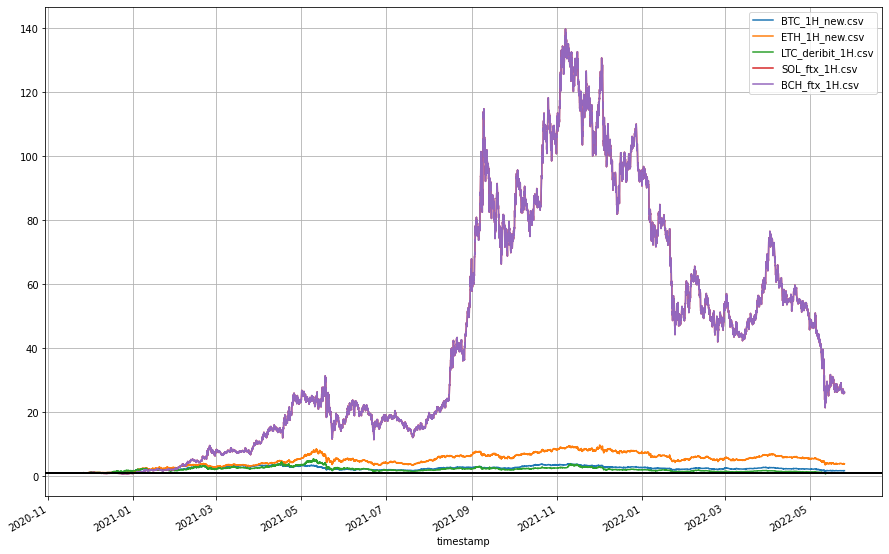

In [ ]:
df_return.plot(grid=True, figsize=(15, 10)).axhline(y = 1, color = "black", lw = 2)

,BTC_1H_new.csv,ETH_1H_new.csv,LTC_deribit_1H.csv,SOL_ftx_1H.csv,BCH_ftx_1H.csv
timestamp,,,,,
2022-05-26,168.892326,379.878001,89.896407,2616.621622,2616.621622


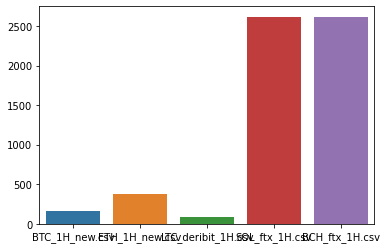

In [ ]:
df_perc = df_return.tail(1) * 100
ax = sns.barplot(data=df_perc)
df_perc

## How many coins could we bought for $1000?

,BTC_1H_new.csv,ETH_1H_new.csv,LTC_deribit_1H.csv,SOL_ftx_1H.csv,BCH_ftx_1H.csv
timestamp,,,,,
2020-11-26 07:00:00,0.056753,1.939563,13.113034,540.540541,540.540541


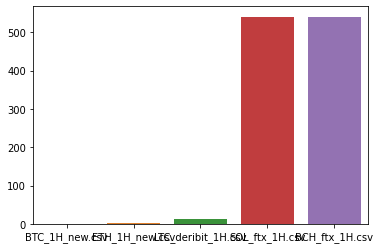

In [ ]:
budget = 1000 # USD
df_coins = budget/df_new.head(1)

ax = sns.barplot(data=df_coins)
df_coins

How much money would we make?

,BTC_1H_new.csv,ETH_1H_new.csv,LTC_deribit_1H.csv,SOL_ftx_1H.csv,BCH_ftx_1H.csv
timestamp,,,,,
2022-05-26,1688.923256,3798.780015,898.96407,26166.216216,26166.216216


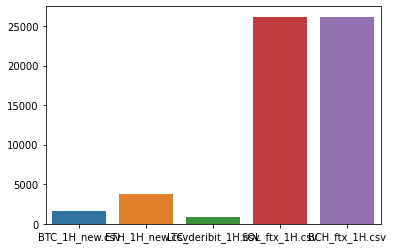

In [ ]:
df_profit = df_return.tail(1) * budget

ax = sns.barplot(data=df_profit)
df_profit

In [ ]:
x = k_new.loc[:, ['ticks_deribit_1H_ETH', 'cost_deribit_1H_ETH',
       'ETH_open_average_1H', 'high_average_1H', 'ETH_volume_average_1H',
       'ETH_price_average_1H', 'ETH_low_average_1H', 'ticks_deribit_1H_BTC',
        'open_deribit_1H_BTC', 'low_deribit_1H_BTC',
       'cost_deribit_1H_BTC', 'BTC_low_average_1H', 'BTC_open_average_1H',
       'BTC_high_average_1H', 'BTC_volume_average_1H', 'open_LTC_2020_ftx_1H',
       'high_LTC_2020_ftx_1H', 'low_LTC_2020_ftx_1H', 'volume_LTC_2020_ftx_1H',
       'open_SOL_2020_ftx_1H', 'high_SOL_2020_ftx_1H', 'low_SOL_2020_ftx_1H',
       'volume_SOL_2020_ftx_1H']]

In [ ]:
y = df_new.loc[:, ['BTC_1H_new.csv', 'ETH_1H_new.csv', 'LTC_deribit_1H.csv',
       'SOL_ftx_1H.csv']]

In [ ]:
x.drop(df.tail(4).index,inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=23)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40, max_depth=5,min_samples_split=40)

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13100 entries, 2020-11-26 07:00:00 to 2022-05-26 00:00:00
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   BTC_1H_new.csv      13100 non-null  int64
 1   ETH_1H_new.csv      13100 non-null  int64
 2   LTC_deribit_1H.csv  13100 non-null  int64
 3   SOL_ftx_1H.csv      13100 non-null  int64
dtypes: int64(4)
memory usage: 511.7 KB


In [ ]:
y['SOL_ftx_1H.csv'] = y['SOL_ftx_1H.csv'].astype(int)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
multi_output_clf = MultiOutputClassifier(LogisticRegression(solver='lbfgs', multi_class='ovr'))
multi_output_clf.fit(x_test.values.reshape(-1, 1),y_test)

ValueError: ignored

In [ ]:


# forest = RandomForestClassifier(n_estimators=16, random_state=1)
multi_target_forest = MultiOutputClassifier(model, n_jobs=-1)
multi_target_forest.fit(x_train, y_train)

# multi_target_forest.predict_proba(X)
multi_target_forest.classes_

ValueError: ignored

In [ ]:
y_pred = model.predict(x_test)

NotFittedError: ignored

In [ ]:
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
model=MultiOutputClassifier(RandomForestClassifier(random_state=42,class_weight="balanced"))

In [ ]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

ValueError: ignored

In [ ]:
eth = pd.read_csv('ETH_1H_new.csv')

In [ ]:
from datetime import datetime
eth = datetime.strptime('11/11/97', '%m/%d/%y')

In [ ]:
eth = eth.astype({'timestamp': 'datetime64'})

AttributeError: ignored

## Prediciting Bit Coin prices for the next five days

In [25]:

from sklearn.metrics import mean_squared_error
import pandas as pd
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time

In [26]:
eth = pd.read_csv('ETH_1H_new.csv')

In [18]:
from datetime import datetime
eth = datetime.strptime('11/11/97', '%m/%d/%y')

In [27]:
import time
import datetime
from datetime import date,timedelta

In [28]:
eth

,Unnamed: 0,timestamp,ticks_deribit_1H_ETH,status_deribit_1H_ETH,cost_deribit_1H_ETH,ETH_open_average_1H,ETH_close_average_1H,high_average_1H,ETH_volume_average_1H,ETH_price_average_1H,ETH_low_average_1H
0,0,2020-11-26 07:00:00,1.606378e+09,ok,6097.0,524.915,515.580,525.030,1236.647065,515.580,513.850
1,1,2020-11-26 08:00:00,1.606381e+09,ok,1093090.0,507.530,498.380,508.400,10450.352488,498.380,491.165
2,2,2020-11-26 09:00:00,1.606385e+09,ok,27638.0,501.625,504.095,506.650,525.102041,504.095,499.990
3,3,2020-11-26 10:00:00,1.606388e+09,ok,31478.0,507.545,512.685,513.475,153.091634,512.685,506.790
4,4,2020-11-26 11:00:00,1.606392e+09,ok,773367.0,511.955,513.850,516.615,881.454193,513.850,509.975
...,...,...,...,...,...,...,...,...,...,...,...
13093,13093,2022-05-25 20:00:00,1.653512e+09,ok,408.0,1954.675,1959.675,1960.725,264812.504954,1959.675,1952.800
13094,13094,2022-05-25 21:00:00,1.653516e+09,ok,0.0,1963.350,1966.750,1967.500,148284.676950,1966.750,1959.300
13095,13095,2022-05-25 22:00:00,1.653520e+09,ok,0.0,1963.075,1961.575,1965.025,185332.871850,1961.575,1959.375
13096,13096,2022-05-25 23:00:00,1.653523e+09,ok,0.0,1951.975,1940.525,1952.075,353480.243650,1940.525,1939.775


In [29]:
eth = eth.astype({'timestamp': 'datetime64'})

In [32]:
eth['date'] = pd.to_datetime(eth['timestamp'],unit='s').dt.date
# btc = pd.to_datetime(df['timestamp'])

display(eth.head())

group = eth.groupby('date')

eth_closing_price_groupby_date = group['ETH_close_average_1H'].mean()

,Unnamed: 0,timestamp,ticks_deribit_1H_ETH,status_deribit_1H_ETH,cost_deribit_1H_ETH,ETH_open_average_1H,ETH_close_average_1H,high_average_1H,ETH_volume_average_1H,ETH_price_average_1H,ETH_low_average_1H,date
0,0,2020-11-26 07:00:00,1.606378e+09,ok,6097.0,524.915,515.580,525.030,1236.647065,515.580,513.850,2020-11-26
1,1,2020-11-26 08:00:00,1.606381e+09,ok,1093090.0,507.530,498.380,508.400,10450.352488,498.380,491.165,2020-11-26
2,2,2020-11-26 09:00:00,1.606385e+09,ok,27638.0,501.625,504.095,506.650,525.102041,504.095,499.990,2020-11-26
3,3,2020-11-26 10:00:00,1.606388e+09,ok,31478.0,507.545,512.685,513.475,153.091634,512.685,506.790,2020-11-26
4,4,2020-11-26 11:00:00,1.606392e+09,ok,773367.0,511.955,513.850,516.615,881.454193,513.850,509.975,2020-11-26


In [33]:

prediction_days = 60

# Set Train data to be uplo ( Total data length - prediction_days )
df_train= eth_closing_price_groupby_date[:len(eth_closing_price_groupby_date)-prediction_days].values.reshape(-1,1)


# Set Test data to be the last prediction_days (or 60 days in this case)
df_test= eth_closing_price_groupby_date[len(eth_closing_price_groupby_date)-prediction_days:].values.reshape(-1,1)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import product
import statsmodels.api as sm

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



In [36]:
import matplotlib.pyplot as plt


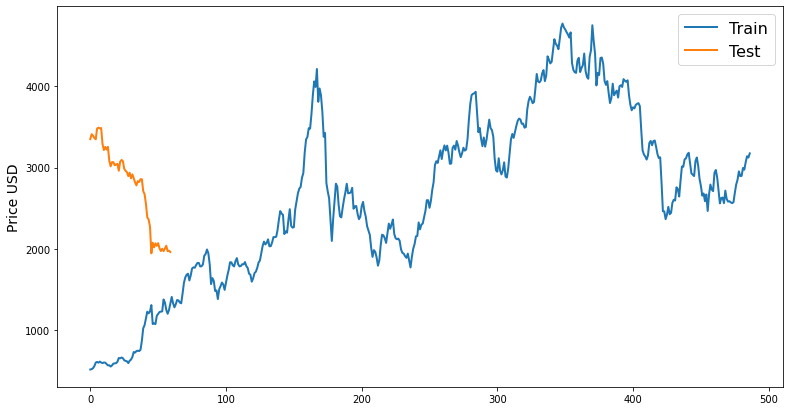

In [37]:
chosen_col = 'Close'

fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(df_train, label='Train', linewidth=2)
ax.plot(df_test, label='Test', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)

Mix Max Scaling of Data post Train-Test Split

In [38]:
scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(df_train)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(df_test)



Dataset Generator for LSTM We will frame the problem to take a window of the last so many number of days of data to predict the current days data.

To achieve this, we will define a new function named dataset_generator_lstm() that will split the input sequence into windows of data appropriate for fitting a supervised learning model, like an LSTM

In [39]:
def dataset_generator_lstm(dataset, look_back=5):
    # A “lookback period” defines the window-size of how many
    # previous timesteps are used in order to predict
    # the subsequent timestep. 
    dataX, dataY = [], []
    
    for i in range(len(dataset) - look_back):
        window_size_x = dataset[i:(i + look_back), 0]
        dataX.append(window_size_x)
        dataY.append(dataset[i + look_back, 0]) # this is the label or actual y-value
    return np.array(dataX), np.array(dataY)

trainX, trainY = dataset_generator_lstm(scaled_train)

testX, testY = dataset_generator_lstm(scaled_test)

print("trainX: ", trainX.shape)
print("trainY: ", trainY.shape)
print("testX: ", testX.shape)
print("testY", testY.shape)

trainX:  (482, 5)
trainY:  (482,)
testX:  (55, 5)
testY (55,)


In [40]:
print("trainX: ", trainX)
print("trainY: ", trainY)
print("testY: ", testX)
print("testY", testY)


trainX:  [[0.         0.00108021 0.00388666 0.00981989 0.01995955]
 [0.00108021 0.00388666 0.00981989 0.01995955 0.02185638]
 [0.00388666 0.00981989 0.01995955 0.02185638 0.01964757]
 ...
 [0.55911991 0.55971003 0.58249594 0.57769807 0.59931862]
 [0.55971003 0.58249594 0.57769807 0.59931862 0.61639841]
 [0.58249594 0.57769807 0.59931862 0.61639841 0.61268361]]
trainY:  [0.02185638 0.01964757 0.02281786 0.0202437  0.01846123 0.02037876
 0.01981086 0.01603922 0.0118429  0.01226641 0.00857451 0.01173039
 0.01701769 0.01771798 0.01833158 0.02236452 0.03330036 0.03231325
 0.03460878 0.03274462 0.02679337 0.02483443 0.02372147 0.01850645
 0.02533748 0.02873732 0.03593649 0.05060643 0.04897021 0.05326267
 0.0542641  0.05333177 0.05694798 0.08279338 0.11908724 0.1281804
 0.14770978 0.16711347 0.1622155  0.16794774 0.18617925 0.13142975
 0.13323966 0.13114409 0.15502771 0.1604616  0.16625854 0.16730572
 0.16818052 0.20245508 0.19354029 0.17205549 0.16110323 0.17204133
 0.19093224 0.20984635 0.1


And now reshape trainX and testX

In [41]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1 ))

print("Shape of trainX: ", trainX.shape)
print("Shape of testX: ", testX.shape)

Shape of trainX:  (482, 5, 1)
Shape of testX:  (55, 5, 1)


In [45]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 128, activation = 'relu',return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, input_shape = (trainX.shape[1], trainX.shape[2])))
# regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))


# Adding a third LSTM layer and some
# Adding the output layer
regressor.add(Dense(units = 1))

regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 5, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Compiling the LSTM
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

checkpoint_path = 'my_best_model.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')


earlystopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

callbacks = [checkpoint, earlystopping]
# callbacks = [checkpoint]


history = regressor.fit(trainX, trainY, batch_size = 32, epochs = 600, verbose=1, shuffle=False, validation_data=(testX, testY), callbacks=callbacks)

Epoch 1/600
15/16 [===========================>..] - ETA: 0s - loss: 0.1400
Epoch 1: val_loss improved from inf to 0.03402, saving model to my_best_model.hdf5
16/16 [==============================] - 4s 70ms/step - loss: 0.1395 - val_loss: 0.0340
Epoch 2/600
13/16 [=======================>......] - ETA: 0s - loss: 0.0208
Epoch 2: val_loss improved from 0.03402 to 0.02878, saving model to my_best_model.hdf5
16/16 [==============================] - 0s 21ms/step - loss: 0.0190 - val_loss: 0.0288
Epoch 3/600
13/16 [=======================>......] - ETA: 0s - loss: 0.0231
Epoch 3: val_loss did not improve from 0.02878
16/16 [==============================] - 0s 15ms/step - loss: 0.0208 - val_loss: 0.0294
Epoch 4/600
14/16 [=========================>....] - ETA: 0s - loss: 0.0169
Epoch 4: val_loss improved from 0.02878 to 0.01503, saving model to my_best_model.hdf5
16/16 [==============================] - 0s 16ms/step - loss: 0.0159 - val_loss: 0.0150
Epoch 5/600
15/16 [=====================

Plot line graph to show Loss Numbers relative to the epoch

In [47]:
from tensorflow.keras.models import load_model

model_from_saved_checkpoint = load_model(checkpoint_path)

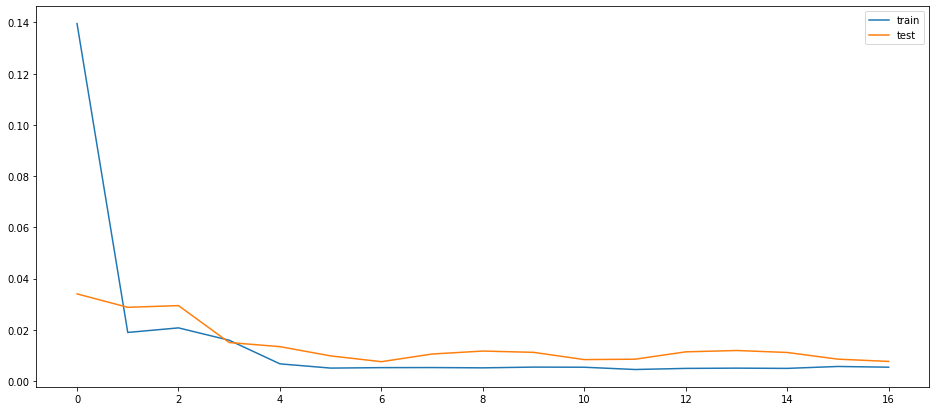

In [48]:
plt.figure(figsize=(16,7))
plt.plot(history.history['loss'], label='train')

plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

LSTM Prediction using trainX and plotting line graph against Actual trainY

In [50]:
# Transformation to original form and making the predictions

# predicted_btc_price_test_data = regressor.predict(testX)
predicted_eth_price_test_data = model_from_saved_checkpoint.predict(testX)

predicted_eth_price_test_data = scaler_test.inverse_transform(predicted_eth_price_test_data.reshape(-1, 1))

test_actual = scaler_test.inverse_transform(testY.reshape(-1, 1))


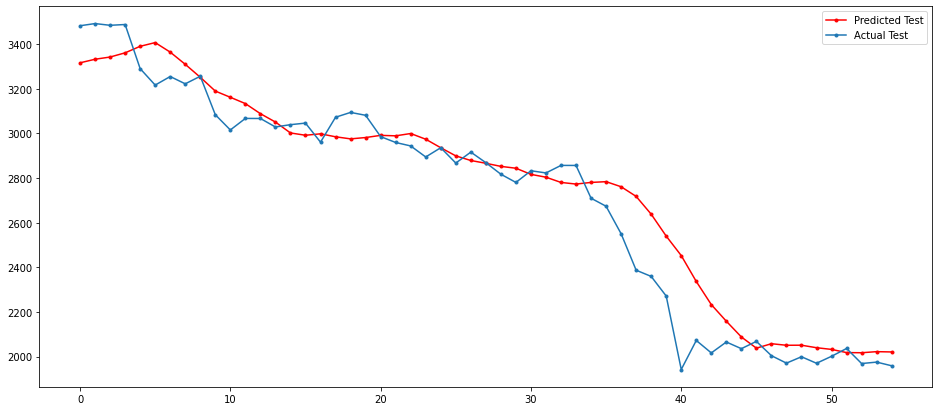

In [51]:
plt.figure(figsize=(16,7))

plt.plot(predicted_eth_price_test_data, 'r', marker='.', label='Predicted Test')

plt.plot(test_actual, marker='.', label='Actual Test')

plt.legend()
plt.show()

LSTM Prediction using trainX and plotting line graph against Actual trainY

In [52]:

# Transformation to original form and making the predictions

predicted_eth_price_train_data = model_from_saved_checkpoint.predict(trainX)

predicted_eth_price_train_data = scaler_train.inverse_transform(predicted_eth_price_train_data.reshape(-1, 1))

train_actual = scaler_train.inverse_transform(trainY.reshape(-1, 1))

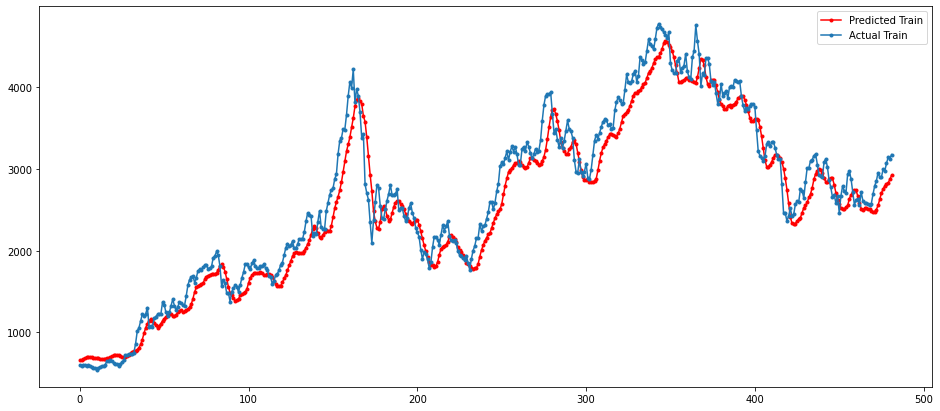

In [54]:
plt.figure(figsize=(16,7))

plt.plot(predicted_eth_price_train_data, 'r', marker='.', label='Predicted Train')

plt.plot(train_actual, marker='.', label='Actual Train')

plt.legend()
plt.show()

RMSE - Train Data

In [55]:
rmse_lstm_test = math.sqrt(mean_squared_error(test_actual, predicted_eth_price_test_data))

print('Test RMSE: %.3f' % rmse_lstm_test)

# With 2 Layers + Dropout + lookback=5 => I got - Test RMSE: 1666.162  => This seems best

Test RMSE: 134.781


RMSE - Test Data

In [56]:
rmse_lstm_train = math.sqrt(mean_squared_error(train_actual, predicted_eth_price_train_data))

print('Test RMSE: %.3f' % rmse_lstm_train)

# With 2 Layers + Dropout + lookback=5 => I got - Test RMSE: 1047.916  => This seems best


Test RMSE: 243.904


now I am going to forecast the ETH Prices for 5 days beyond my data using the trained LSTM model above.

First check the shape of testX

In [57]:
testX
testX.shape

(55, 5, 1)

In [58]:
lookback_period = 5

# That is the original Trading data ended on 30-Oct-2021, but now I am going to forecast for Future 5 days beyond 30-Oct-2021

testX_last_5_days = testX[testX.shape[0] - lookback_period :  ]

testX_last_5_days.shape

(5, 5, 1)

In [59]:
predicted_5_days_forecast_price_test_x = []

for i in range(5):  
  predicted_forecast_price_test_x = model_from_saved_checkpoint.predict(testX_last_5_days[i:i+1])
  
  predicted_forecast_price_test_x = scaler_test.inverse_transform(predicted_forecast_price_test_x.reshape(-1, 1))
  # print(predicted_forecast_price_test_x)
  predicted_5_days_forecast_price_test_x.append(predicted_forecast_price_test_x)
  
print("Forecast for the next 5 Days Beyond the actual trading days ", np.array(predicted_5_days_forecast_price_test_x)) 

Forecast for the next 5 Days Beyond the actual trading days  [[[2031.9243]]

 [[2017.6548]]

 [[2016.965 ]]

 [[2021.8589]]

 [[2020.4894]]]


In [60]:
predicted_5_days_forecast_price_test_x = np.array(predicted_5_days_forecast_price_test_x)

predicted_5_days_forecast_price_test_x.shape

(5, 1, 1)

Predicted for the next five days

In [61]:
predicted_5_days_forecast_price_test_x


array([[[2031.9243]],

       [[2017.6548]],

       [[2016.965 ]],

       [[2021.8589]],

       [[2020.4894]]], dtype=float32)

In [62]:
predicted_5_days_forecast_price_test_x = predicted_5_days_forecast_price_test_x.flatten()

predicted_5_days_forecast_price_test_x

array([2031.9243, 2017.6548, 2016.965 , 2021.8589, 2020.4894],
      dtype=float32)

In [63]:
predicted_eth_price_test_data = predicted_eth_price_test_data.flatten()

predicted_eth_price_test_data


array([3316.0095, 3332.0608, 3341.9453, 3360.778 , 3390.0107, 3406.6294,
       3363.914 , 3309.3215, 3251.266 , 3189.4097, 3161.5789, 3133.314 ,
       3088.1555, 3050.6257, 3001.7954, 2991.4233, 2997.9226, 2984.575 ,
       2975.2288, 2981.2253, 2990.958 , 2988.89  , 2999.2476, 2973.7126,
       2935.4995, 2899.047 , 2878.3914, 2865.8806, 2851.9756, 2843.7378,
       2816.1824, 2803.5017, 2780.0679, 2772.7324, 2780.098 , 2783.4956,
       2760.75  , 2717.47  , 2637.8162, 2539.5898, 2452.3967, 2336.3054,
       2232.6719, 2158.1807, 2087.6526, 2037.5334, 2057.4185, 2050.4712,
       2050.75  , 2039.4932, 2031.9243, 2017.6548, 2016.965 , 2021.8589,
       2020.4894], dtype=float32)

In [67]:
predicted_eth_test_concatenated = np.concatenate((predicted_eth_price_test_data, predicted_5_days_forecast_price_test_x))

predicted_eth_test_concatenated

predicted_eth_test_concatenated.shape

(60,)

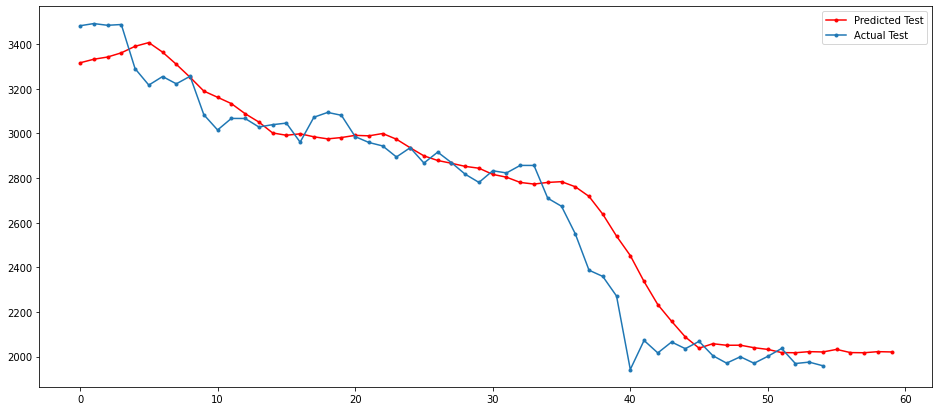

In [68]:
plt.figure(figsize=(16,7))

plt.plot(predicted_eth_test_concatenated, 'r', marker='.', label='Predicted Test')

plt.plot(test_actual, marker='.', label='Actual Test')

plt.legend()

plt.show()


Finally Plot entire Predictions of Test Data (including the Future 5-days ) against Actual testY bold text

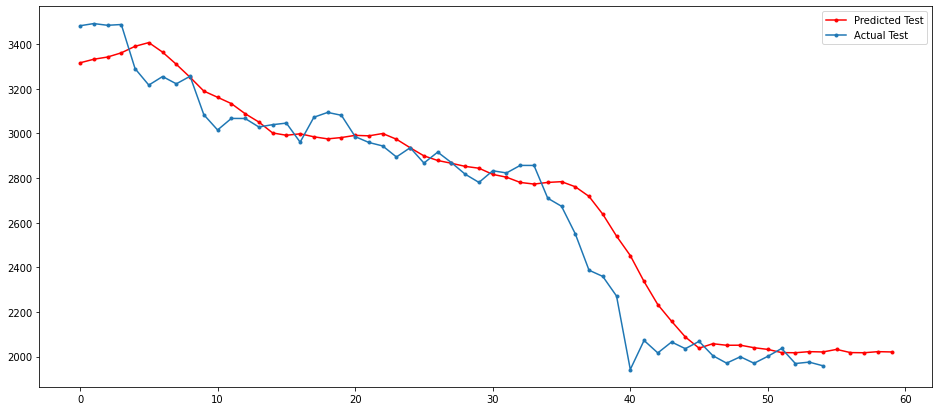

In [69]:
plt.figure(figsize=(16,7))

plt.plot(predicted_eth_test_concatenated, 'r', marker='.', label='Predicted Test')

plt.plot(test_actual, marker='.', label='Actual Test')

plt.legend()

plt.show()

# Predicting BTC for the next five days


In [7]:

from sklearn.metrics import mean_squared_error

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [24]:
btc = pd.read_csv('BTC_1H_new.csv')

FileNotFoundError: ignored

In [5]:
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import math

In [ ]:
btc.columns

Index(['Unnamed: 0', 'timestamp', 'ticks_deribit_1H_BTC',
       'status_deribit_1H_BTC', 'open_deribit_1H_BTC', 'low_deribit_1H_BTC',
       'cost_deribit_1H_BTC', 'BTC_low_average_1H', 'BTC_open_average_1H',
       'BTC_close_average_1H', 'BTC_high_average_1H', 'BTC_volume_average_1H'],
      dtype='object')

In [ ]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13098 entries, 0 to 13097
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             13098 non-null  int64  
 1   timestamp              13098 non-null  object 
 2   ticks_deribit_1H_BTC   13098 non-null  float64
 3   status_deribit_1H_BTC  13098 non-null  object 
 4   open_deribit_1H_BTC    13098 non-null  float64
 5   low_deribit_1H_BTC     13098 non-null  float64
 6   cost_deribit_1H_BTC    13098 non-null  float64
 7   BTC_low_average_1H     13098 non-null  float64
 8   BTC_open_average_1H    13098 non-null  float64
 9   BTC_close_average_1H   13098 non-null  float64
 10  BTC_high_average_1H    13098 non-null  float64
 11  BTC_volume_average_1H  13098 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
btc = btc.astype({'timestamp': 'datetime64'})

AttributeError: ignored

In [ ]:
btc['date'] = pd.to_datetime(btc['timestamp'],unit='s').dt.date
# btc = pd.to_datetime(df['timestamp'])

display(btc.head())

group = btc.groupby('date')

btc_closing_price_groupby_date = group['BTC_close_average_1H'].mean()

,Unnamed: 0,timestamp,ticks_deribit_1H_BTC,status_deribit_1H_BTC,open_deribit_1H_BTC,low_deribit_1H_BTC,cost_deribit_1H_BTC,BTC_low_average_1H,BTC_open_average_1H,BTC_close_average_1H,BTC_high_average_1H,BTC_volume_average_1H,date
0,0,2020-11-26 07:00:00,1.606378e+09,ok,17548.5,17548.5,54840.0,17517.25,17751.00,17620.25,17793.00,32685.508547,2020-11-26
1,1,2020-11-26 08:00:00,1.606381e+09,ok,16848.0,16848.0,958020.0,16589.50,17228.00,16863.00,17264.25,139769.021435,2020-11-26
2,2,2020-11-26 09:00:00,1.606385e+09,ok,17100.5,16987.5,32999650.0,16830.00,16965.25,17063.75,17195.00,7589.607285,2020-11-26
3,3,2020-11-26 10:00:00,1.606388e+09,ok,17288.5,17288.5,47070.0,17168.50,17168.50,17293.50,17312.00,3366.625336,2020-11-26
4,4,2020-11-26 11:00:00,1.606392e+09,ok,17084.5,17037.5,374780.0,17004.75,17183.25,17119.25,17271.00,4047.914934,2020-11-26


In [ ]:

prediction_days = 60

# Set Train data to be uplo ( Total data length - prediction_days )
df_train= btc_closing_price_groupby_date[:len(btc_closing_price_groupby_date)-prediction_days].values.reshape(-1,1)


# Set Test data to be the last prediction_days (or 60 days in this case)
df_test= btc_closing_price_groupby_date[len(btc_closing_price_groupby_date)-prediction_days:].values.reshape(-1,1)

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import product
import statsmodels.api as sm

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



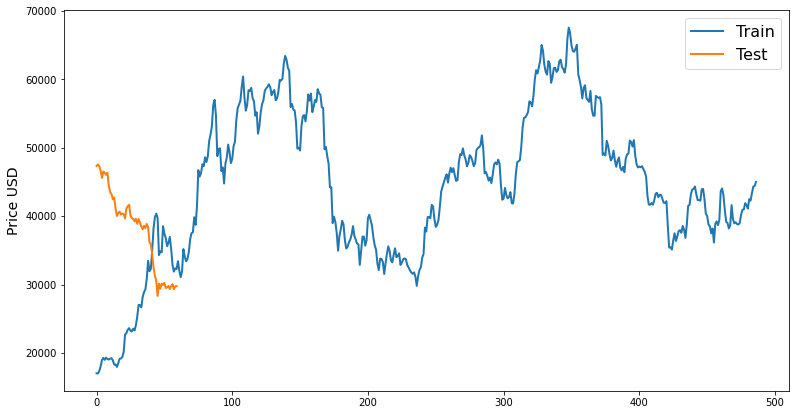

In [ ]:
chosen_col = 'Close'

fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(df_train, label='Train', linewidth=2)
ax.plot(df_test, label='Test', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)

Mix Max Scaling of Data post Train-Test Split

In [ ]:
scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(df_train)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(df_test)


Dataset Generator for LSTM
We will frame the problem to take a window of the last so many number of days of data to predict the current days data.

To achieve this, we will define a new function named dataset_generator_lstm() that will split the input sequence into windows of data appropriate for fitting a supervised learning model, like an LSTM

In [ ]:
def dataset_generator_lstm(dataset, look_back=5):
    # A “lookback period” defines the window-size of how many
    # previous timesteps are used in order to predict
    # the subsequent timestep. 
    dataX, dataY = [], []
    
    for i in range(len(dataset) - look_back):
        window_size_x = dataset[i:(i + look_back), 0]
        dataX.append(window_size_x)
        dataY.append(dataset[i + look_back, 0]) # this is the label or actual y-value
    return np.array(dataX), np.array(dataY)

trainX, trainY = dataset_generator_lstm(scaled_train)

testX, testY = dataset_generator_lstm(scaled_test)

print("trainX: ", trainX.shape)
print("trainY: ", trainY.shape)
print("testX: ", testX.shape)
print("testY", testY.shape)

trainX:  (482, 5)
trainY:  (482,)
testX:  (55, 5)
testY (55,)


In [ ]:
print("trainX: ", trainX)
print("trainY: ", trainY)
print("testY: ", testX)
print("testY", testY)


trainX:  [[0.00063439 0.         0.00699117 0.02049564 0.03875255]
 [0.         0.00699117 0.02049564 0.03875255 0.04509955]
 [0.00699117 0.02049564 0.03875255 0.04509955 0.03944158]
 ...
 [0.48705655 0.47684166 0.50379709 0.49983968 0.52157118]
 [0.47684166 0.50379709 0.49983968 0.52157118 0.54041771]
 [0.50379709 0.49983968 0.52157118 0.54041771 0.5419456 ]]
trainY:  [0.04509955 0.03944158 0.04575771 0.0419705  0.04028167 0.04311045
 0.04400426 0.03828331 0.0255751  0.02606924 0.01902723 0.02984883
 0.04255025 0.04351939 0.04772356 0.06235275 0.11217592 0.11693761
 0.1264252  0.13110148 0.12401008 0.12143135 0.12958758 0.12456349
 0.1395372  0.16491596 0.19864112 0.19742769 0.19133218 0.22130408
 0.2352323  0.24308703 0.27323263 0.32582635 0.29559101 0.30244265
 0.35502422 0.41952536 0.45178642 0.46207664 0.44956415 0.34233494
 0.35324833 0.35021395 0.42590385 0.40427711 0.39185496 0.36800224
 0.37773102 0.39484098 0.35985795 0.31315106 0.29453771 0.3038415
 0.30218046 0.32475164 0.2

And now reshape trainX and testX

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1 ))

print("Shape of trainX: ", trainX.shape)
print("Shape of testX: ", testX.shape)

Shape of trainX:  (482, 5, 1)
Shape of testX:  (55, 5, 1)


In [ ]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 128, activation = 'relu',return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, input_shape = (trainX.shape[1], trainX.shape[2])))
# regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))


# Adding a third LSTM layer and some
# Adding the output layer
regressor.add(Dense(units = 1))

regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 5, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Compiling the LSTM
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

checkpoint_path = 'my_best_model.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')


earlystopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

callbacks = [checkpoint, earlystopping]
# callbacks = [checkpoint]


history = regressor.fit(trainX, trainY, batch_size = 32, epochs = 600, verbose=1, shuffle=False, validation_data=(testX, testY), callbacks=callbacks)

Epoch 1/600
15/16 [===========================>..] - ETA: 0s - loss: 0.1747
Epoch 1: val_loss improved from inf to 0.02441, saving model to my_best_model.hdf5
16/16 [==============================] - 11s 110ms/step - loss: 0.1740 - val_loss: 0.0244
Epoch 2/600
12/16 [=====================>........] - ETA: 0s - loss: 0.0204
Epoch 2: val_loss improved from 0.02441 to 0.02394, saving model to my_best_model.hdf5
16/16 [==============================] - 0s 13ms/step - loss: 0.0176 - val_loss: 0.0239
Epoch 3/600
12/16 [=====================>........] - ETA: 0s - loss: 0.0198
Epoch 3: val_loss did not improve from 0.02394
16/16 [==============================] - 0s 13ms/step - loss: 0.0173 - val_loss: 0.0328
Epoch 4/600
16/16 [==============================] - ETA: 0s - loss: 0.0118
Epoch 4: val_loss improved from 0.02394 to 0.01706, saving model to my_best_model.hdf5
16/16 [==============================] - 0s 14ms/step - loss: 0.0118 - val_loss: 0.0171
Epoch 5/600
12/16 [===================


Plot line graph to show Loss Numbers relative to the epoch

In [ ]:
from tensorflow.keras.models import load_model

model_from_saved_checkpoint = load_model(checkpoint_path)

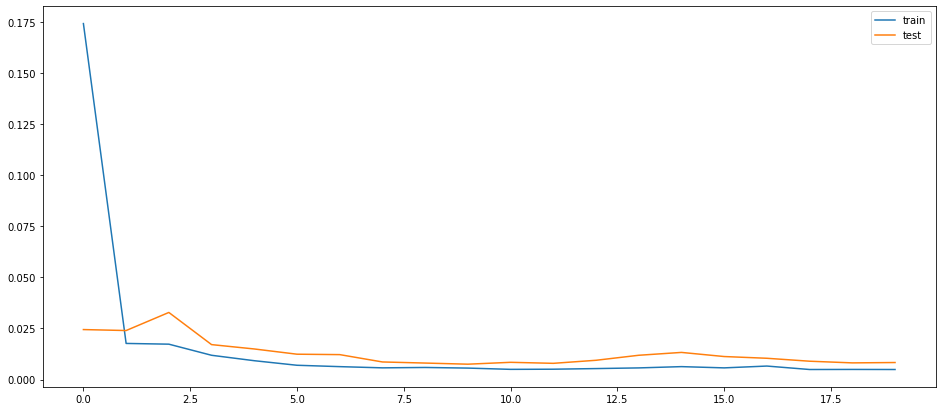

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(history.history['loss'], label='train')

plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

LSTM Predictions using testX and plotting line graph against Actual testY
Due to scaling step done earlier with MinMaxScaler the predicted scale is between 0 and 1. I transfer this scale to the original data scale (real value). for example:[0.58439621 0.58439621 0.58439621 ... 0.81262134 0.81262134 0.81262134], the pred answer transfer to :[250 100 50 60 .....] So here I am going to use inverse_transform to Scale back the data to the original representation.

In [ ]:
# Transformation to original form and making the predictions

# predicted_btc_price_test_data = regressor.predict(testX)
predicted_btc_price_test_data = model_from_saved_checkpoint.predict(testX)

predicted_btc_price_test_data = scaler_test.inverse_transform(predicted_btc_price_test_data.reshape(-1, 1))

test_actual = scaler_test.inverse_transform(testY.reshape(-1, 1))


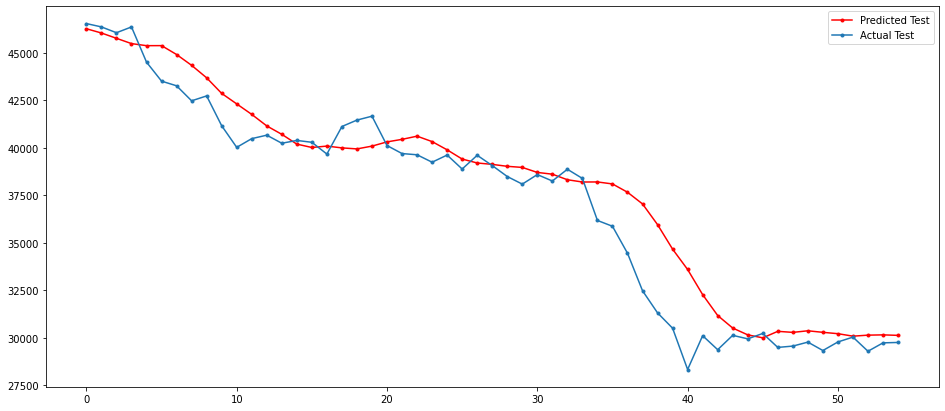

In [ ]:

plt.figure(figsize=(16,7))

plt.plot(predicted_btc_price_test_data, 'r', marker='.', label='Predicted Test')

plt.plot(test_actual, marker='.', label='Actual Test')

plt.legend()
plt.show()


LSTM Prediction using trainX and plotting line graph against Actual trainY

In [ ]:
# Transformation to original form and making the predictions

predicted_btc_price_train_data = model_from_saved_checkpoint.predict(trainX)

predicted_btc_price_train_data = scaler_train.inverse_transform(predicted_btc_price_train_data.reshape(-1, 1))

train_actual = scaler_train.inverse_transform(trainY.reshape(-1, 1))


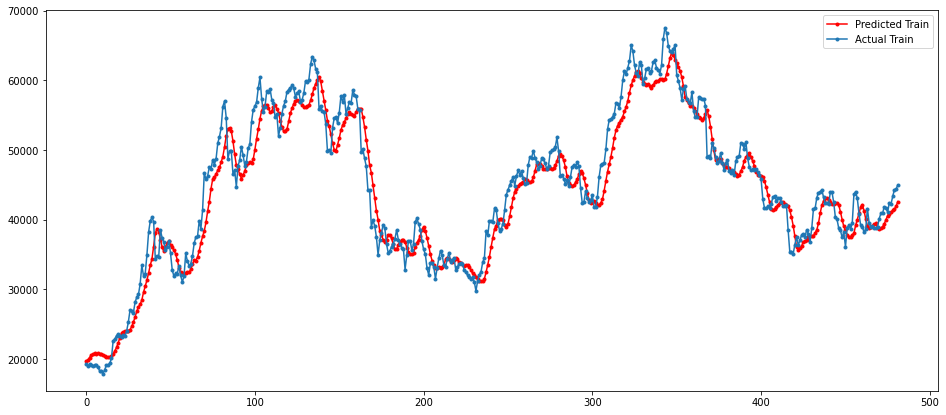

In [ ]:
plt.figure(figsize=(16,7))

plt.plot(predicted_btc_price_train_data, 'r', marker='.', label='Predicted Train')

plt.plot(train_actual, marker='.', label='Actual Train')

plt.legend()
plt.show()


now I am going to forecast the Bitcoin Prices for 5 days beyond my data using the trained LSTM model above.

First check the shape of testX

In [ ]:
testX
testX.shape

(55, 5, 1)

In [ ]:
lookback_period = 5

# That is the original Trading data ended on 30-Oct-2021, but now I am going to forecast for Future 5 days beyond 30-Oct-2021

testX_last_5_days = testX[testX.shape[0] - lookback_period :  ]

testX_last_5_days.shape

(5, 5, 1)

In [ ]:
testX_last_5_days

array([[[0.0986267 ],
        [0.06044813],
        [0.06404173],
        [0.07493139],
        [0.05193054]],

       [[0.06044813],
        [0.06404173],
        [0.07493139],
        [0.05193054],
        [0.07537342]],

       [[0.06404173],
        [0.07493139],
        [0.05193054],
        [0.07537342],
        [0.08862866]],

       [[0.07493139],
        [0.05193054],
        [0.07537342],
        [0.08862866],
        [0.0499279 ]],

       [[0.05193054],
        [0.07537342],
        [0.08862866],
        [0.0499279 ],
        [0.07289788]]])

In [ ]:
predicted_5_days_forecast_price_test_x = []

for i in range(5):  
  predicted_forecast_price_test_x = model_from_saved_checkpoint.predict(testX_last_5_days[i:i+1])
  
  predicted_forecast_price_test_x = scaler_test.inverse_transform(predicted_forecast_price_test_x.reshape(-1, 1))
  # print(predicted_forecast_price_test_x)
  predicted_5_days_forecast_price_test_x.append(predicted_forecast_price_test_x)
  
print("Forecast for the next 5 Days Beyond the actual trading days ", np.array(predicted_5_days_forecast_price_test_x))

Forecast for the next 5 Days Beyond the actual trading days  [[[30220.213]]

 [[30090.186]]

 [[30143.299]]

 [[30158.393]]

 [[30131.945]]]


In [ ]:
predicted_btc_price_test_data


array([[46260.71 ],
       [46037.68 ],
       [45758.55 ],
       [45479.723],
       [45371.12 ],
       [45373.59 ],
       [44906.203],
       [44336.49 ],
       [43679.76 ],
       [42860.53 ],
       [42308.05 ],
       [41756.57 ],
       [41149.688],
       [40707.312],
       [40193.023],
       [40015.152],
       [40088.523],
       [39994.023],
       [39940.695],
       [40087.21 ],
       [40309.56 ],
       [40443.285],
       [40610.652],
       [40325.117],
       [39891.973],
       [39406.645],
       [39200.37 ],
       [39126.535],
       [39025.258],
       [38966.76 ],
       [38703.355],
       [38610.707],
       [38318.906],
       [38199.047],
       [38202.496],
       [38098.03 ],
       [37661.45 ],
       [37046.344],
       [35956.49 ],
       [34668.344],
       [33597.5  ],
       [32275.23 ],
       [31176.633],
       [30517.16 ],
       [30158.43 ],
       [30001.82 ],
       [30344.557],
       [30289.385],
       [30372.84 ],
       [30291.66 ],


In [ ]:
predicted_5_days_forecast_price_test_x = np.array(predicted_5_days_forecast_price_test_x)

predicted_5_days_forecast_price_test_x.shape

(5, 1, 1)

In [ ]:
predicted_5_days_forecast_price_test_x = predicted_5_days_forecast_price_test_x.flatten()

predicted_5_days_forecast_price_test_x


array([30220.213, 30090.186, 30143.299, 30158.393, 30131.945],
      dtype=float32)

In [ ]:
predicted_btc_price_test_data = predicted_btc_price_test_data.flatten()

predicted_btc_price_test_data


array([46260.71 , 46037.68 , 45758.55 , 45479.723, 45371.12 , 45373.59 ,
       44906.203, 44336.49 , 43679.76 , 42860.53 , 42308.05 , 41756.57 ,
       41149.688, 40707.312, 40193.023, 40015.152, 40088.523, 39994.023,
       39940.695, 40087.21 , 40309.56 , 40443.285, 40610.652, 40325.117,
       39891.973, 39406.645, 39200.37 , 39126.535, 39025.258, 38966.76 ,
       38703.355, 38610.707, 38318.906, 38199.047, 38202.496, 38098.03 ,
       37661.45 , 37046.344, 35956.49 , 34668.344, 33597.5  , 32275.23 ,
       31176.633, 30517.16 , 30158.43 , 30001.82 , 30344.557, 30289.385,
       30372.84 , 30291.66 , 30220.213, 30090.186, 30143.299, 30158.393,
       30131.945], dtype=float32)

In [ ]:
predicted_btc_test_concatenated = np.concatenate((predicted_btc_price_test_data, predicted_5_days_forecast_price_test_x))

predicted_btc_test_concatenated

predicted_btc_test_concatenated.shape

(60,)

## **Finally** Plot entire Predictions of Test Data (including the Future 5-days ) against Actual testY bold text

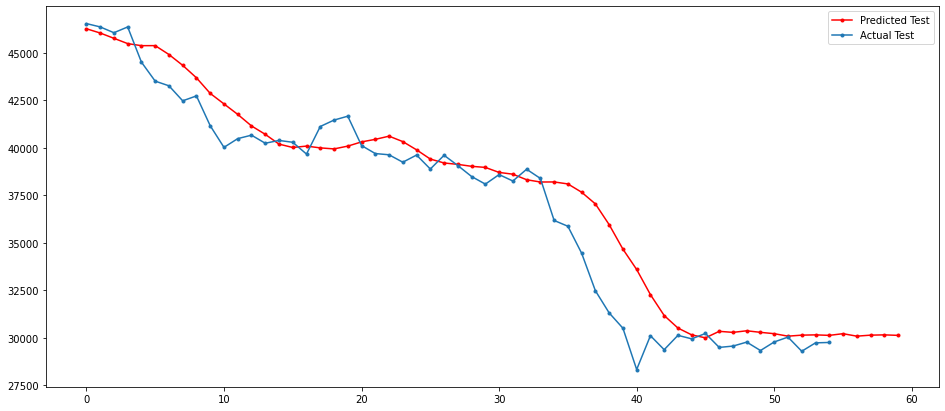

In [ ]:
plt.figure(figsize=(16,7))

plt.plot(predicted_btc_test_concatenated, 'r', marker='.', label='Predicted Test')

plt.plot(test_actual, marker='.', label='Actual Test')

plt.legend()

plt.show()

# Pridicting When ETH prices would go up with Support Vector Machines

In [ ]:
df6= pd.read_csv('ETH_ftx_1H (1).csv', parse_dates=['timestamp'], index_col=['timestamp'])

In [ ]:
future_days = 5

In [ ]:
df6[str(future_days)+'_Day_Price_Forest'] = df6['close'].shift(-future_days)

This means for example 2020-11-26 the closing price is 515.580 five days from now the price would be 524

In [ ]:
#show the data
df6[['close', str(future_days)+'_Day_Price_Forest']]

,close,5_Day_Price_Forest
timestamp,,
2020-11-26 07:00:00,514.61,524.17
2020-11-26 08:00:00,497.46,513.82
2020-11-26 09:00:00,502.34,502.94
2020-11-26 10:00:00,512.57,506.85
2020-11-26 11:00:00,514.60,498.95
...,...,...
2022-05-25 20:00:00,1959.40,NaN
2022-05-25 21:00:00,1966.20,NaN
2022-05-25 22:00:00,1963.20,NaN


In [ ]:
df6.columns

Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume', 'price',
       '5_Day_Price_Forest'],
      dtype='object')

In [ ]:
del df6['Unnamed: 0']

In [ ]:
x = np.array(df6[['close']])
x = x[:df.shape[0] - future_days]
print(x)

[[ 514.61]
 [ 497.46]
 [ 502.34]
 ...
 [1960.7 ]
 [1973.3 ]
 [1949.8 ]]


In [ ]:
y = np.array(df6[str(future_days)+'_Day_Price_Forest'])
y = y[:-future_days]
print(y)

[ 524.17  513.82  502.94 ... 1963.2  1940.3  1957.2 ]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

I am getting 99% accuracy predicting for the next five days

In [ ]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.996309027461158


In [ ]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[2442.8932673  2833.96956902 1107.05958836 ... 2683.53058226 2341.69907174
 2951.29120968]


In [ ]:
print(y_test)

[3108.8 2914.9 2260.4 ... 1975.3 1818.5 2112.9]


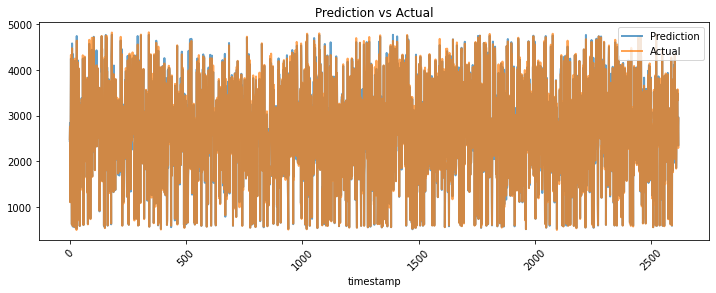

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label='Prediction', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('Prediction vs Actual')
# plt.ylabel('Prices')
plt.xlabel('timestamp')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Prediction of ETH 1H Prices

In [ ]:
df5 = pd.read_csv('ETH_1H.csv', parse_dates=['timestamp'], index_col=['timestamp'])

In [ ]:
df5['Next_hour'] = df5['ETH_close_average_1H'].shift(-1)

In [ ]:
df5['Target'] = (df5['Next_hour'] > df5['ETH_close_average_1H']).astype(int)

Now we have the Target column. 1 when the prices goes up. That is when Tomorrow prices is greater than today prices. And a 0 when the price goes down. Now this is what we are trying to predict

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
df5.columns

Index(['Unnamed: 0', 'ticks_deribit_1H_ETH', 'status_deribit_1H_ETH',
       'cost_deribit_1H_ETH', 'ETH_open_average_1H', 'ETH_close_average_1H',
       'high_average_1H', 'ETH_volume_average_1H', 'ETH_price_average_1H',
       'ETH_low_average_1H', 'Next_hour', 'Target'],
      dtype='object')

## Here i am using all the columns before the last 1000 train the data and using the last 1000 data to test the data 

In [ ]:
train = df5.iloc[:-1000]
test = df5.iloc[-1000:]

predictors = ['cost_deribit_1H_ETH', 'ETH_open_average_1H', 'ETH_close_average_1H',
       'high_average_1H', 'ETH_volume_average_1H', 'ETH_price_average_1H',
       'ETH_low_average_1H']
model.fit(train[predictors], train['Target'])


RandomForestClassifier(min_samples_split=500, n_estimators=500)

In [ ]:
df5['ETH_low_average_1H'] = df5['ETH_low_average_1H'].astype(int)

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [ ]:
preds = pd.Series(preds, index=test.index)

Here when we said the model go up it only went up 48% of the time

In [ ]:
precision_score(test['Target'], preds)

0.48365122615803813

In [ ]:
df5['Next_hour '] = df5['Next_hour '].astype(int)

In [ ]:
del df5['status_deribit_1H_ETH']

In [ ]:
print(classification_report(test['Target'], preds))

              precision    recall  f1-score   support

           0       0.54      0.28      0.37       523
           1       0.48      0.74      0.59       477

    accuracy                           0.50      1000
   macro avg       0.51      0.51      0.48      1000
weighted avg       0.51      0.50      0.47      1000



In [ ]:
y_pred_proba = model.predict_proba(test[predictors])[:,1]
fpr, tpr, thresholds = roc_curve(train['Target'], y_pred_proba)

ValueError: ignored

Making it better using back testing

```
# This is formatted as code
```



In [ ]:
combined = pd.concat([test['Target'], preds], axis=1)

In [ ]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train['Target'])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name='Predictions')
  combined = pd.concat([test['Target'], preds], axis=1)
  return combined

In [ ]:
def backtest(data, model, predictors, start=1500, step=250):
  all_predictions = []
  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [ ]:
predictions = backtest(df5, model, predictors)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500, min_samples_split=500)

In [ ]:
import pandas as pd


In [ ]:
df_1 = pd.read_csv('BCH_2H_ftx.csv', parse_dates=['timestamp'], index_col=['timestamp'])
df_2 = pd.read_csv('BTC_2H_ftx.csv', parse_dates=['timestamp'], index_col=['timestamp'])
df_3 = pd.read_csv('ETH_2H_ftx.csv', parse_dates=['timestamp'], index_col=['timestamp'])
df_4 = pd.read_csv('LTC_2H_ftx.csv', parse_dates=['timestamp'], index_col=['timestamp'])


In [ ]:
df_new_1 = pd.DataFrame({'BCH_2H_ftx.csv': df_1.close,
                   'ETH_2H_ftx.csv': df_2.close,
                   'LTC_2H_ftx.csv': df_3.close,
                   'BTC_2H_ftx.csv':df_4.close})
df_new_1.head()

,BCH_2H_ftx.csv,ETH_2H_ftx.csv,LTC_2H_ftx.csv,BTC_2H_ftx.csv
timestamp,,,,
2020-11-26 06:00:00,NaN,NaN,NaN,NaN
2020-11-26 08:00:00,271.625,16830.0,497.46,74.085
2020-11-26 10:00:00,280.650,17282.0,512.57,74.845
2020-11-26 12:00:00,280.375,17366.0,524.17,75.250
2020-11-26 14:00:00,265.925,16715.5,502.94,69.820


In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df_2['timestamp'],
    open=df_2['open_BTC_ftx_2H'],
    high=df_2['high_BTC_ftx_2H'],
    low=df_2['low_BTC_ftx_2H'],
    close=df_2['close'])])
fig.update_xaxes(title_text='timestamp')
fig.update_yaxes(title_text='price')
fig.update_layout(xaxis_rangeslider_visible=True, 
     title = 'Bitcoin/US Dollar 2H Changes'
) # Set Set Range Slider Bar and Title
fig.show()

## According to this chart Bitcoin had it highest peak Nov 2021 at 66k and since then there have been a downward change in prices

## Predicting the next day price of LTC

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('LTC_ftx_1H (1).csv')
df.set_index("timestamp", inplace=True)

In [ ]:
df


,Unnamed: 0,open_LTC_ftx_1H,high_LTC_ftx_1H,low_LTC_ftx_1H,close,volume_LTC_ftx_1H,price
timestamp,,,,,,,
2020-11-26 07:00:00,0,77.360,77.360,74.330,76.260,14935.85510,76.260
2020-11-26 08:00:00,1,76.260,76.340,71.745,74.085,77399.29870,74.085
2020-11-26 09:00:00,2,74.085,75.505,73.585,74.865,14022.25285,74.865
2020-11-26 10:00:00,3,74.865,75.620,74.180,74.845,446.76910,74.845
2020-11-26 11:00:00,4,74.845,75.275,73.305,73.900,110.51895,73.900
...,...,...,...,...,...,...,...
2022-05-25 20:00:00,13093,68.170,68.680,68.090,68.590,133863.56630,68.590
2022-05-25 21:00:00,13094,68.590,68.805,68.445,68.725,111549.80225,68.725
2022-05-25 22:00:00,13095,68.725,68.735,68.280,68.565,34332.46390,68.565


In [ ]:
df = df[['close']]

In [ ]:
# A variable for predicting 'n' days out into the future
forecast_out = 30
# create another column 
df['Prediction'] = df[['close']].shift(-forecast_out)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df.head(1)

,close,Prediction
timestamp,,
2020-11-26 07:00:00,76.26,74.085


In [ ]:
# Create the independent data set
x = np.array(df.drop(['Prediction'], 1))
#Remove the last 'n' rows
x = x[:-forecast_out]
print(x)

[[76.26 ]
 [74.085]
 [74.865]
 ...
 [69.545]
 [69.385]
 [69.31 ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
## Create the dependent data (y)
y = np.array(df['Prediction'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y)

[68.825 67.445 65.985 ... 68.565 68.135 68.555]


In [ ]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
#create and train our model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma= 0.1)

In [ ]:
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

We are getting a 94% accuracy

In [ ]:
## Testing our model
# the best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print('svm_confidence ', svm_confidence)

svm_confidence  0.9464164819214973


In [ ]:
x_forecast = np.array(df.drop(['Prediction'], 1))[-forecast_out:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


This are what are our prices would be in 30 days

In [ ]:
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[70.18205853 70.10328698 70.03193517 70.04204245 70.12754278 70.18191655
 70.11495479 69.63233266 69.71938898 69.89295023 70.15441274 70.18152499
 70.10248736 70.0894783  70.07563967 69.79728877 69.50201611 69.51345323
 69.71095335 69.68378412 69.58197169 69.5001006  69.52784831 69.67789668
 69.50257983 69.56922622 69.63312531 69.55930483 69.50747395 69.55552059]


BCH 16 Hours prices

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

In [ ]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


In [ ]:
df = pd.read_csv('BCH_16H_ftx.csv' , parse_dates=['timestamp'])


In [ ]:
df = df.sort_values('timestamp')

In [ ]:
df.head(2)

,Unnamed: 0,Unnamed: 0.1,open_BCH_ftx_1H,high_BCH_ftx_1H,low_BCH_ftx_1H,close,volume_BCH_ftx_1H,price
timestamp,,,,,,,,
2020-11-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-26 16:00:00,9.0,9.0,270.475,274.35,258.025,262.85,13255.786,262.85


Text(0, 0.5, 'Close Price (USD)')

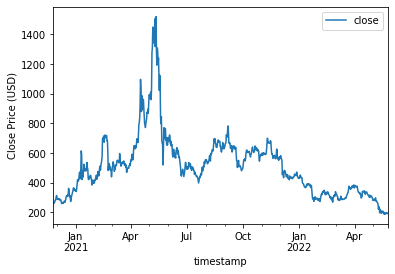

In [ ]:
ax = df.plot(x='timestamp', y='close');
# ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

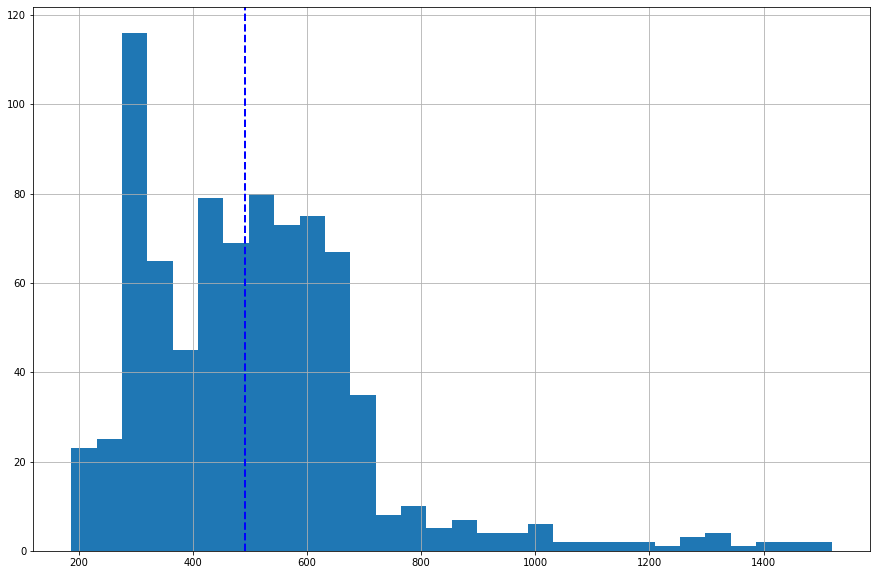

In [ ]:
df['close'].hist(bins=30, figsize=(15,10)).axvline(df['close'].median(), color='b', linestyle='dashed', linewidth=2)

In [ ]:
scaler = MinMaxScaler()

close_price = df.close.values.reshape(-1, 1)

scaled_close = scaler.fit_transform(close_price)

In [ ]:
scaled_close.shape

(820, 1)

In [ ]:
scaled_close = scaled_close.reshape(-1, 1)

Preprocessing



In [ ]:
SEQ_LEN = 100

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

In [ ]:
X_train.shape

(684, 99, 1)

In [ ]:
tf.keras.layers.Bidirectional()

TypeError: ignored

In [ ]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

model = keras.Sequential()

model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(CuDNNLSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=False)))

model.add(Dense(units=1))

model.add(Activation('linear'))

ValueError: ignored

In [ ]:
tf.keras.layers.Layer()